#**PROJECT TITLE : LENDING CLUB'S LOAN APPROVAL OPTIMIZATION BY REDUCING THE DEFAULTERS PERCENTAGE**

* **OBJECTIVE OF THE PROJECT :**

We are going to analyse the US based Lending Club's online Loan applicants data which is regarding loan accepted applicants and rejected applicants from Lending club's side.

So to understand the hidden patterns in the dataset we are going to apply Data cleaning process, Feature selection, Feature Engineering, EDA and Visualization. Then we are going to build a optimising Machine Learning model which will help the Lending Club and Lenders to decide whom to provide loan and whom to not, and then finally we gonna deploy that model into cloud server for the ease of end user.

In [ ]:
#importing python libraries for analysis:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Let's mount the google drive with colab:

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Loading Loan Accepted Dataset from Google Drive:

df_Accepted = pd.read_csv("/content/drive/MyDrive/Kaggle/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv") #Path of my Google drive source
df_Accepted.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_Accepted.shape

(2260701, 151)

In [ ]:
df_Accepted.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [ ]:
List = list(df_Accepted.columns)
print(List)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [ ]:
List.sort()

print(List)

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'debt_settlement_flag_date', 'deferral_term', 'delinq_2yrs', 'delinq_amnt', 'desc', 'disbursement_method', 'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_flag', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'home_ownership', 'id', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', '

In [ ]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 151)
pd.set_option('display.max_colwidth', 2000)
pd.set_option('max_colwidth', 2000)
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
#There's an external file which is helping us to understand the features description better. let's import it from Google Drive:

df_Description = pd.read_excel("/content/drive/MyDrive/Kaggle/LCDataDictionary.xlsx", sheet_name = 0, index_col=0) #Path of my Google drive source
df_Description

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan application
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by the borrower during registration.
annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
avg_cur_bal,Average current balance of all accounts
bc_open_to_buy,Total open to buy on revolving bankcards.


In [ ]:
df_Description.index

Index([           'acc_now_delinq',      'acc_open_past_24mths',
                      'addr_state',                  'all_util',
                      'annual_inc',          'annual_inc_joint',
                'application_type',               'avg_cur_bal',
                  'bc_open_to_buy',                   'bc_util',
       ...
             'disbursement_method',      'debt_settlement_flag',
       'debt_settlement_flag_date',         'settlement_status',
                 'settlement_date',         'settlement_amount',
           'settlement_percentage',           'settlement_term',
                               nan,                         nan],
      dtype='object', name='LoanStatNew', length=153)

In [ ]:
Missing_Value = df_Accepted.isnull().sum().sort_values(ascending=False)

In [ ]:
Missing_Value_PCT = df_Accepted.isnull().mean().sort_values(ascending=False)*100

In [ ]:
Missing_Values_df = pd.DataFrame({
    "Features" : Missing_Value.index,
    "No.of Missing_Value" : Missing_Value.values,
    "Percentages of Missing_Value" : Missing_Value_PCT.values
})
Missing_Values_df

,Features,No.of Missing_Value,Percentages of Missing_Value
0,member_id,2260701,100.000
1,orig_projected_additional_accrued_interest,2252050,99.617
2,hardship_loan_status,2249784,99.517
3,hardship_dpd,2249784,99.517
4,hardship_reason,2249784,99.517
5,hardship_status,2249784,99.517
6,deferral_term,2249784,99.517
7,hardship_amount,2249784,99.517
8,hardship_start_date,2249784,99.517
9,hardship_end_date,2249784,99.517


 **Since our dataset contains 2.2M records, its good to drop features which contains more than 25% of missing values..
May some features have valid numerical data, maybe we can think of imputing some mean or median with those missing, 
but due to large portion of missing(aprox 565175) it'll affect the accuracy of the prediction**

**So i am deciding to drop those features with more than 25% Missing values**


In [ ]:
#Fetch the Features in list who's missing values are more than 25%

Missing_Val_List = list(Missing_Values_df["Features"][Missing_Values_df["Percentages of Missing_Value"]>25])
len(Missing_Val_List)

58

In [ ]:
#So we gonna remove those Missing Features from the Loan Accepted Dataset:

df_Accepted.drop(labels = Missing_Val_List, axis=1, inplace=True)

In [ ]:
df_Accepted.shape

(2260701, 93)

#**LETS REMOVE SOME UNWANTED COLUMNS WHICH WILL NOT SUPPORT IN OUR ANALYSIS**

In [ ]:
#Let's read the available 93 columns description:

Col_present = list(df_Accepted.columns)

In [ ]:
col = []
for i in Col_present:
  if i in df_Description.index:
    col.append(i)

#print(col)
print(len(col)) #This will help us to select those available 92 features from df_Description, so we can read & understand

92


In [ ]:
#Read all the features, understand it and then decide which features are relevant and non-relevant:

df_Description.loc[col].head()  #Expand it as per the requirement

,Description
LoanStatNew,
id,A unique LC assigned ID for the loan listing.
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
funded_amnt,The total amount committed to that loan at that point in time.
funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
term,The number of payments on the loan. Values are in months and can be either 36 or 60.


 **By reading each and every description of the existing features(Col_present), 
i found some important features for further analysis and some non relevant features. So both are listed below and non relevant features must be dropped from the Dataset**



* **Important_Features** = ["loan_amnt", "term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc", "loan_status","purpose","dti", "zip_code", "addr_state","fico_range_low", "fico_range_high","pub_rec","application_type"]



* **Features_Need_to_be_Dropped_From_The_Dataset** = 
['id', 'funded_amnt', 'funded_amnt_inv', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']

Even in the Important_Features(has 19 column) is not a Finalised Features for modeling, maybe after done with some EDA and visualization part, if there is any irrelavance then we can drop them..

In [ ]:
Important_Features = ["loan_amnt", "term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc",
                      "loan_status","purpose","dti", "zip_code", "addr_state","fico_range_low","fico_range_high", 'delinq_amnt',"pub_rec","application_type"]

Features_Need_to_be_Dropped = []   #Let's get the unwanted feature list to drop
for i in Col_present:
  if i in Important_Features:
    pass
  else:
    Features_Need_to_be_Dropped.append(i)

# print(Features_Need_to_be_Dropped)

In [ ]:
Important_Features = ["loan_amnt", "term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc",
                      "loan_status","purpose","dti", "zip_code", "addr_state","fico_range_low","fico_range_high","pub_rec","application_type"]

Features_Need_to_be_Dropped = ['id', 'funded_amnt', 'funded_amnt_inv', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'title', 'delinq_2yrs','earliest_cr_line', 'inq_last_6mths',
 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high',
 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths',
 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats',
 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
 'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']


In [ ]:
df_Accepted.drop(labels=Features_Need_to_be_Dropped, axis=1, inplace=True)

In [ ]:
df_Accepted.shape

(2260701, 20)

In [ ]:
df_Accepted.dtypes

loan_amnt           float64
term                 object
int_rate            float64
installment         float64
grade                object
sub_grade            object
emp_title            object
emp_length           object
home_ownership       object
annual_inc          float64
loan_status          object
purpose              object
zip_code             object
addr_state           object
dti                 float64
fico_range_low      float64
fico_range_high     float64
pub_rec             float64
application_type     object
delinq_amnt         float64
dtype: object

In [ ]:
df_Accepted.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,zip_code,addr_state,dti,fico_range_low,fico_range_high,pub_rec,application_type,delinq_amnt
0,3600.000,36 months,13.990,123.030,C,C4,leadman,10+ years,MORTGAGE,55000.000,Fully Paid,debt_consolidation,190xx,PA,5.910,675.000,679.000,0.000,Individual,0.000
1,24700.000,36 months,11.990,820.280,C,C1,Engineer,10+ years,MORTGAGE,65000.000,Fully Paid,small_business,577xx,SD,16.060,715.000,719.000,0.000,Individual,0.000
2,20000.000,60 months,10.780,432.660,B,B4,truck driver,10+ years,MORTGAGE,63000.000,Fully Paid,home_improvement,605xx,IL,10.780,695.000,699.000,0.000,Joint App,0.000
3,35000.000,60 months,14.850,829.900,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.000,Current,debt_consolidation,076xx,NJ,17.060,785.000,789.000,0.000,Individual,0.000
4,10400.000,60 months,22.450,289.910,F,F1,Contract Specialist,3 years,MORTGAGE,104433.000,Fully Paid,major_purchase,174xx,PA,25.370,695.000,699.000,0.000,Individual,0.000


In [ ]:
df_Accepted["loan_status"].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

# **TARGET VARIABLE = LOAN_STATUS**

In this project our target variable is loan_status. Based on the Re-payment and Default status of customers we are going to decide whom to give loan and whom to not..

From **Loan_status**, we are only interested to analysis for those customers who've **fully repaid their loan and Charged Off(Defaulters category)**. So let's proceed our analysis on only these two terms

In [ ]:
df_Accepted = df_Accepted.loc[df_Accepted["loan_status"].isin(["Fully Paid","Charged Off"])]
df_Accepted["loan_status"].value_counts(normalize=True)

Fully Paid    0.800
Charged Off   0.200
Name: loan_status, dtype: float64

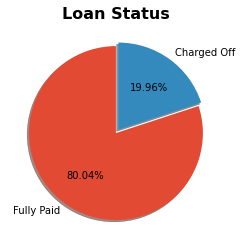

In [ ]:
plt.style.use('ggplot')

data = df_Accepted["loan_status"].value_counts(normalize=True)
plt.pie(data, labels=data.index, startangle = 90, shadow = True, radius=1, explode= [0,0.05],autopct='%0.2f%%')
plt.title("Loan Status", fontsize=16, fontweight='bold')
plt.show()

In [ ]:
df_Accepted.shape

(1345310, 20)

In [ ]:
df_Accepted.dtypes

loan_amnt           float64
term                 object
int_rate            float64
installment         float64
grade                object
sub_grade            object
emp_title            object
emp_length           object
home_ownership       object
annual_inc          float64
loan_status          object
purpose              object
zip_code             object
addr_state           object
dti                 float64
fico_range_low      float64
fico_range_high     float64
pub_rec             float64
application_type     object
delinq_amnt         float64
dtype: object

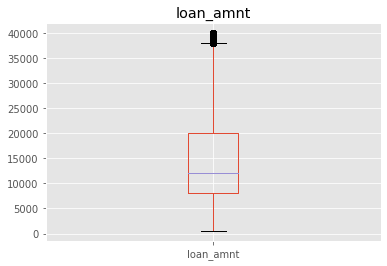

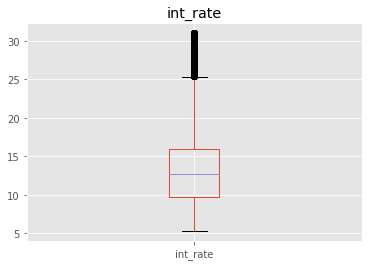

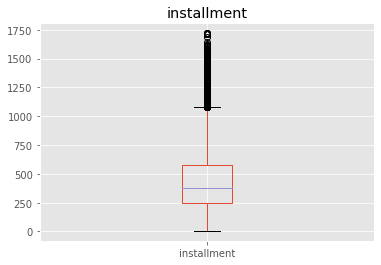

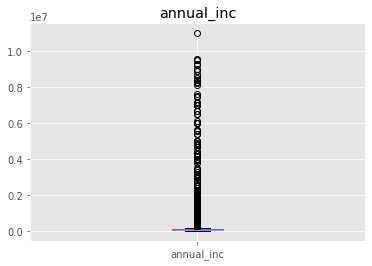

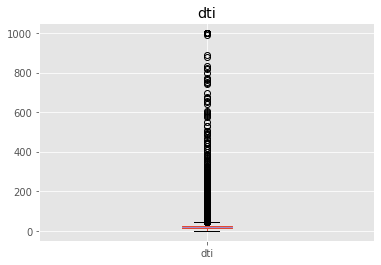

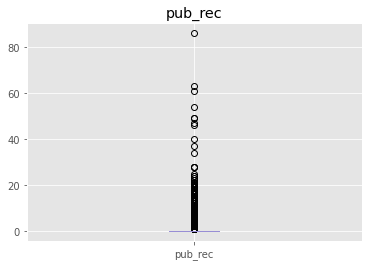

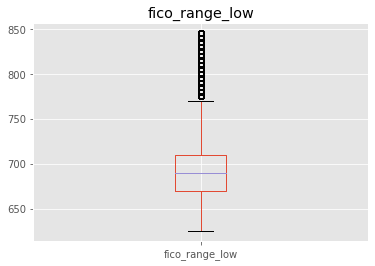

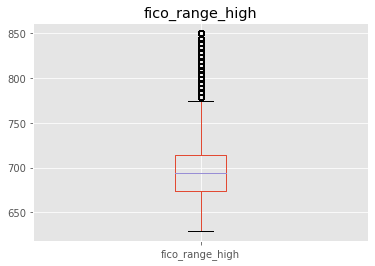

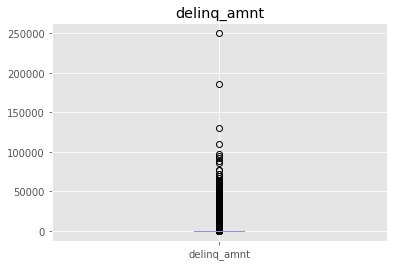

In [ ]:
#Let's Explore the Numerical data by using Boxplot (so we can understand the outliers):

import matplotlib.pyplot as plt

List = ["loan_amnt","int_rate","installment","annual_inc", "dti", "pub_rec", "fico_range_low", "fico_range_high", "delinq_amnt"]

for column in List:
    plt.figure()
    plt.title(column)
    df_Accepted.boxplot([column])

so the above shown features are having outliers, so we need to remove outliers.

In [ ]:
df_Accepted.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title           85785
emp_length          78511
home_ownership          0
annual_inc              0
loan_status             0
purpose                 0
zip_code                1
addr_state              0
dti                   374
fico_range_low          0
fico_range_high         0
pub_rec                 0
application_type        0
delinq_amnt             0
dtype: int64

#**1) LOAN AMOUNT:**

In [ ]:
df_Accepted["loan_amnt"].describe()

count   1345310.000
mean      14419.972
std        8717.051
min         500.000
25%        8000.000
50%       12000.000
75%       20000.000
max       40000.000
Name: loan_amnt, dtype: float64

As per the current status of lending club, they've not provided loan less than 1000 Dollars and more than 40000 Dollars to any customers. So let's find the records beyond these limit and drop them.

In [ ]:
df_Accepted["loan_status"][df_Accepted["loan_amnt"]<1000].value_counts()

Fully Paid     11
Charged Off     1
Name: loan_status, dtype: int64

In [ ]:
Drop_loan_amount = df_Accepted["loan_status"][df_Accepted["loan_amnt"]<1000].index

In [ ]:
df_Accepted.drop(labels= Drop_loan_amount, axis=0, inplace=True)

In [ ]:
df_Accepted["loan_status"][df_Accepted["loan_amnt"]>40000].value_counts()

Series([], Name: loan_status, dtype: int64)

In [ ]:
pd.pivot_table(df_Accepted, index='loan_status', aggfunc='mean')

,annual_inc,delinq_amnt,dti,fico_range_high,fico_range_low,installment,int_rate,loan_amnt,pub_rec
loan_status,,,,,,,,,
Charged Off,70400.961,19.434,20.171,691.850,687.850,465.150,15.711,15565.110,0.247
Fully Paid,77706.465,13.764,17.812,702.264,698.264,431.327,12.623,14134.507,0.207


In [ ]:
df_Accepted.shape

(1345298, 20)

In [ ]:
df_Accepted.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,pub_rec,delinq_amnt
count,1345298.000,1345298.000,1345298.000,1345298.000,1344924.000,1345298.000,1345298.000,1345298.000,1345298.000
mean,14420.095,13.240,438.079,76248.088,18.283,696.185,700.185,0.215,14.896
std,8716.993,4.769,261.511,69925.231,11.160,31.852,31.853,0.602,809.529
min,1000.000,5.310,4.930,0.000,-1.000,625.000,629.000,0.000,0.000
25%,8000.000,9.750,248.480,45785.145,11.790,670.000,674.000,0.000,0.000
50%,12000.000,12.740,375.430,65000.000,17.610,690.000,694.000,0.000,0.000
75%,20000.000,15.990,580.730,90000.000,24.060,710.000,714.000,0.000,0.000
max,40000.000,30.990,1719.830,10999200.000,999.000,845.000,850.000,86.000,249925.000


In [ ]:
df_Accepted.describe(include=["O"])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,loan_status,purpose,zip_code,addr_state,application_type
count,1345298,1345298,1345298,1259515,1266787,1345298,1345298,1345298,1345297,1345298,1345298
unique,2,7,35,378346,11,6,2,14,943,51,2
top,36 months,B,C1,Teacher,10+ years,MORTGAGE,Fully Paid,debt_consolidation,945xx,CA,Individual
freq,1020731,392737,85493,21268,442199,665575,1076740,780319,15005,196526,1319498


#**2) INTEREST RATE:**

general loan principle is, a good trust worthy customer will get loan easily with less interest rate for his credibility(Also his FICO Score, debt to income ratio both are well maintained in an appropriate level).

Then a customer with less Risk score and high DTI are always risky customers, generally banks and lenders charge them more interest.

So these variety of customers are graded and sub_graded into different different categories.

In [ ]:
df_Accepted["int_rate"].describe()

count   1345298.000
mean         13.240
std           4.769
min           5.310
25%           9.750
50%          12.740
75%          15.990
max          30.990
Name: int_rate, dtype: float64

In [ ]:
pd.pivot_table(df_Accepted, index='loan_status', values="int_rate", aggfunc='mean')

,int_rate
loan_status,
Charged Off,15.711
Fully Paid,12.623


So Charged off customers were paying more interest than Fully Paid Custometrs

In [ ]:
#Let's compare their average interest rate with grade of the customers

pd.pivot_table(df_Accepted, index='loan_status',columns="grade", values="int_rate", aggfunc='mean')

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,7.389,10.789,14.079,17.790,21.201,25.099,27.946
Fully Paid,7.095,10.662,14.005,17.692,21.099,24.799,27.506


**OUTLIER DETECTION USING INTER QURTILE RANGE:**

In [ ]:
Q1 = np.quantile(df_Accepted["int_rate"],0.25)
Q3 = np.quantile(df_Accepted["int_rate"],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)

Low_outliers : 0.39
High_outliers : 25.35
Q1 : 9.75
Q3 : 15.99
IQR : 6.24


**OUTLIER DETECTION USING Z-SCORE TECHNIQUE:**

**Z score = (x -mean) / std. deviation**

A normal distribution is shown below and it is estimated that,

* 68% of the data points lie between +/- 1 standard deviation.
* 95% of the data points lie between +/- 2 standard deviation
* 99.7% of the data points lie between +/- 3 standard deviation

In [ ]:
data = df_Accepted["int_rate"] 
mean = round(np.mean(data) , 4)
std = round(np.std(data),4)
print('mean of the dataset is', mean) 
print('std. deviation is', std)


threshold = 3
outlier = [] 
for i in data: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i)

# print('outlier in dataset is', outlier)

mean of the dataset is 13.2396
std. deviation is 4.7687


In [ ]:
print(min(outlier))     #Outier threshold (starting value)
print(len(outlier))    #Total No.of Outliers

27.79
9764


Providing loan with highest interest rate is influencing more defaulters with lending club. so let's remove those outliers.

Since based on two outlier detection techniques like IQR, Z-score method we got 25.35 and 27.79. So **let's drop outlier interest rate with Z-score technique of 27.79**.

In [ ]:
df_Accepted["loan_status"][df_Accepted["int_rate"]>= min(outlier)].value_counts()

Charged Off    4916
Fully Paid     4848
Name: loan_status, dtype: int64

Charged Off and Fully Paid ratio is too high in a 20% : 80% Dataset.
This clearly shows that people who's borrowing with highest interest rate are not re-paying the loan properly. Let's remove these Outliers.

In [ ]:
outlier_interest_rate = list(df_Accepted[df_Accepted["int_rate"]>=27.79].index)
print(len(outlier_interest_rate))

9764


In [ ]:
df_Accepted.shape

(1345298, 20)

In [ ]:
df_Accepted.drop(labels=outlier_interest_rate, axis=0, inplace=True)

In [ ]:
df_Accepted.shape

(1335534, 20)

**Let's Visualise how the interest rate is distributed:**

Mean interest rate of the Fully Paid customers: 13.12


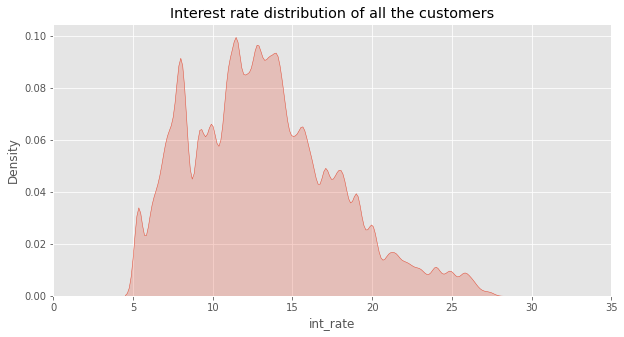

In [ ]:
#Commonly for both Fully paid and Charged Off Customers:

interest_rate = df_Accepted["int_rate"]
print("Mean interest rate of the Fully Paid customers:", round(interest_rate.mean(),2))

plt.figure(figsize=(10,5))
plt.xlim(0, 35)
plt.title('Interest rate distribution of all the customers')
sns.kdeplot(interest_rate,shade=True)
plt.show()

Mean interest rate of the Fully Paid customers: 12.55


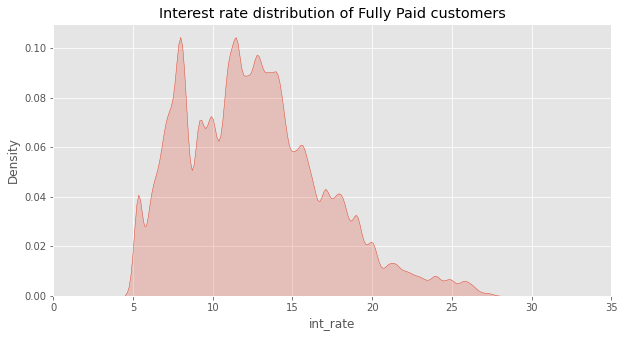

In [ ]:
#Interest rate distribution of Fully Paid customers:

Fp = df_Accepted["int_rate"][df_Accepted["loan_status"] == "Fully Paid"]
print("Mean interest rate of the Fully Paid customers:", round(Fp.mean(),2))
plt.figure(figsize=(10,5))
plt.xlim(0, 35)
plt.title('Interest rate distribution of Fully Paid customers')
sns.kdeplot(Fp, shade=True)
plt.show()

Mean interest rate of the Charged Off customers: 15.45


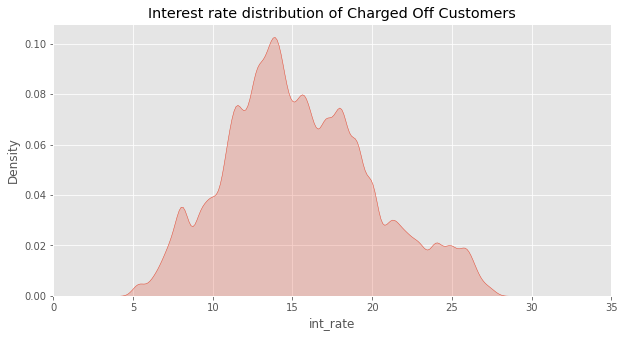

In [ ]:
#Interest rate distribution of Charged Off Customers:

Co = df_Accepted["int_rate"][df_Accepted["loan_status"] == "Charged Off"]
print("Mean interest rate of the Charged Off customers:", round(Co.mean(),2))
plt.figure(figsize=(10,5))
plt.xlim(0, 35)
plt.title('Interest rate distribution of Charged Off Customers')
sns.kdeplot( Co, shade=True)
plt.show()

**Interest Rate Risk:**
Based on the analysis most of the customers with more than 18% of interest rate are not repaying the loan properly.

In [ ]:
df_Accepted["loan_status"][df_Accepted["int_rate"]>18].value_counts()

Fully Paid     123432
Charged Off     72138
Name: loan_status, dtype: int64

#**(3) ANNUAL INCOME**


In [ ]:
df_Accepted["annual_inc"].describe()

count    1335534.000
mean       76270.908
std        70074.912
min            0.000
25%        45760.000
50%        65000.000
75%        90000.000
max     10999200.000
Name: annual_inc, dtype: float64



Based on annual income summary, the mean income of the US employees is 65000 Dollars and 25% and 75% is respectively 45760 and 90000 Dollars.

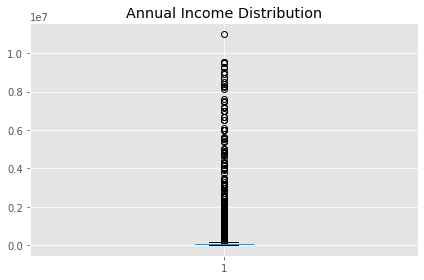

In [ ]:
plt.boxplot(df_Accepted["annual_inc"])
plt.title("Annual Income Distribution")
plt.tight_layout()
plt.show()

**OUTLIER DETECTION USING INTER QURTILE RANGE:**

Since we have a so much of outliers, let's detect the Outliers

In [ ]:
Q1 = np.quantile(df_Accepted["annual_inc"],0.25)
Q3 = np.quantile(df_Accepted["annual_inc"],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)
print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

Q1 : 45760.0
Q3 : 90000.0
IQR : 44240.0
Low_outliers : -20600.0
High_outliers : 156360.0


**OUTLIER DETECTION USING Z-SCORE TECHNIQUE:**

Z score = (x -mean) / std. deviation

In [ ]:
data = df_Accepted["annual_inc"]
mean = round(np.mean(data) , 4)
std = round(np.std(data),4)
print('mean of the dataset is', mean) 
print('std. deviation is', std)

threshold1 = -3
threshold2 =  3
outlier_annual_income = [] 
for i in data: 
    z = (i-mean)/std 
    if z < threshold1 or z > threshold2: 
        outlier_annual_income.append(i)

#print("outliers in the dataset :", outlier_annual_income)

mean of the dataset is 76270.908
std. deviation is 70074.8859


In [ ]:
print(min(outlier_annual_income))
print(len(outlier_annual_income))

286800.0
9964


This dataset Annual Income has some anamolies like 10999200 Dollars, so we need to drop those kind of records.

Based on two outlier detection techniques, we are choosing Z-SCORE technique to remove Annual income Outliers.

In [ ]:
Outlier_Annual_inc = list(df_Accepted[df_Accepted["annual_inc"]>=min(outlier_annual_income)].index)  #Based on Z-Score Threshold
#Outlier_Annual_inc

In [ ]:
df_Accepted.shape

(1335534, 20)

In [ ]:
df_Accepted.drop(labels=Outlier_Annual_inc, axis=0, inplace=True)

In [ ]:
df_Accepted.shape

(1325570, 20)

#**(4) What Is Debt-to-Income (DTI) Ratio?**

The debt-to-income (DTI) ratio is the percentage of your gross monthly income that goes to paying your monthly debt payments and is used by lenders to determine your borrowing risk.

**DTI= (Total of Monthly Debt Payments / Gross Monthly Income)** 

In this dataset it is DTI percentage have given

Generally Debt to income ratio lower than 18% Considered Excellent. 18% to 35% is considered very good percentage(Less than 36% or upto 35% dti percentage shows that you are in a very good financial condition). **Based on 2021 Lending club's fact, having at least 40% of DTI percentage will help the borrowers to get loan**.

Though 43% is a maximum debt to income percentage a borrower can have for Qulifying loans. because borrowers with more than 43% of dti percentage will find difficulty in paying their bills.

In [ ]:
#Let's Check the Null:

df_Accepted["dti"].isnull().sum()

361

In [ ]:
# Let's Check the Output result ratio for these DTI null values:

df_Accepted["loan_status"][df_Accepted["dti"].isnull()].value_counts()

Fully Paid     295
Charged Off     66
Name: loan_status, dtype: int64

In [ ]:
df_Accepted.dropna(subset=["dti"], axis=0, inplace=True)

In [ ]:
df_Accepted["dti"].isnull().any()

False

In [ ]:
df_Accepted.shape

(1325209, 20)

In [ ]:
df_Accepted["dti"].describe()

count   1325209.000
mean         18.311
std          11.057
min          -1.000
25%          11.860
50%          17.650
75%          24.060
max         999.000
Name: dti, dtype: float64

**Debt to income ratio percentage Distribution:**

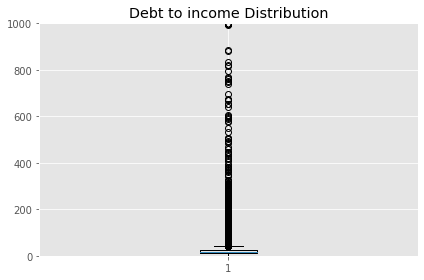

In [ ]:
plt.boxplot(df_Accepted["dti"])
plt.title("Debt to income Distribution")
plt.ylim(0,1000)
plt.tight_layout()
plt.show()

let's check outliers in DTI ratio percentage using IQR and Z-SCORE:

**OUTLIER DETECTION USING INTER QURTILE RANGE:**

In [ ]:
Q1 = np.quantile(df_Accepted["dti"],0.25)
Q3 = np.quantile(df_Accepted["dti"],0.75)
IQR = Q3 - Q1

IQR_Low_outliers = Q1-1.5*IQR
IQR_High_outliers = Q3+1.5*IQR

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)
print("Low_outliers :", round(IQR_Low_outliers,2))
print("High_outliers :", round(IQR_High_outliers,2))

Q1 : 11.86
Q3 : 24.06
IQR : 12.2
Low_outliers : -6.44
High_outliers : 42.36


**OUTLIER DETECTION USING Z-SCORE TECHNIQUE:**

Z score = (x -mean) / std. deviation

In [ ]:
data = df_Accepted["dti"] 
mean = round(np.mean(data) , 4)
std = round(np.std(data),4)
print('mean of the dataset is', mean) 
print('std. deviation is', std)


threshold1 = -3
threshold2 =  3
outliers = [] 
for i in data: 
    z = (i-mean)/std 
    if z < threshold1 or z > threshold2: 
        outliers.append(i)

#print('outlier in the dataset:', outliers)
print('DTI threshold:', min(outliers))
print('No.of the outliers:', len(outliers))

mean of the dataset is 18.3108
std. deviation is 11.0569
DTI threshold: 51.49
No.of the outliers: 2449


**Based on two Outliers removing techniques,**

* IQR Outlier threshold is 42.36
* Z-Score Outlier threshold is 51.49

Here IQR technique looks pretty logical, because more than 43% of DTI ratio indicates kind of a financial burden.So let's remove DTI ratio percentage which is more than 42.36

In [ ]:
#Effect of DTI_Outliers removal on Target Feature("loan_status"):

df_Accepted["loan_status"][df_Accepted["dti"]> round(IQR_High_outliers,2)].value_counts()

Fully Paid     3739
Charged Off    1515
Name: loan_status, dtype: int64

Most of the customers are Defaulters when considering DTI is more than 42.36. {"Fully_paid_records:80% ", "Charged Off_Records:20%"}

In [ ]:
DTI_Outliers = list(df_Accepted["dti"][df_Accepted["dti"]>42.36].index)
print(len(DTI_Outliers))

5254


In [ ]:
df_Accepted.shape

(1325209, 20)

In [ ]:
df_Accepted.drop(labels=DTI_Outliers, axis=0, inplace=True)

In [ ]:
df_Accepted["dti"].describe()

count   1319955.000
mean         18.087
std           8.349
min          -1.000
25%          11.830
50%          17.610
75%          23.970
max          42.360
Name: dti, dtype: float64

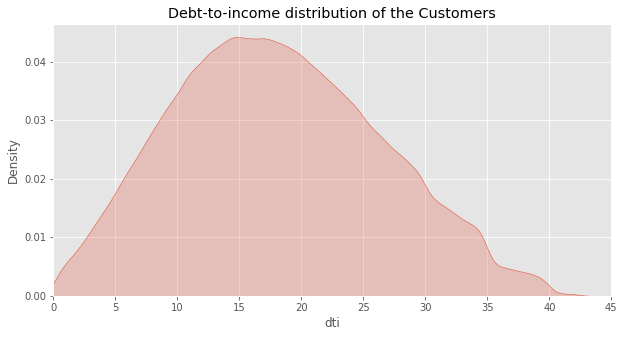

In [ ]:
#Debt to income ratio percentage distribution of Customers:

dti = df_Accepted["dti"]
plt.figure(figsize=(10,5))
plt.xlim(0, 45)
plt.title('Debt-to-income distribution of the Customers')
sns.kdeplot(dti , shade=True)
plt.show()

  **Debt-To-Income Ratio Risk:**

Still if a customer is getting loan with more than 35% of Debt-To-Income Ratio, most of them are struggling to repay.

In [ ]:
df_Accepted["loan_status"][df_Accepted["dti"]>35].value_counts() # Dataset{Fully Paid:Charged Off} = {80:20}

Fully Paid     20097
Charged Off     8886
Name: loan_status, dtype: int64

In [ ]:
df_Accepted.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,pub_rec,delinq_amnt
count,1319955.000,1319955.000,1319955.000,1319955.000,1319955.000,1319955.000,1319955.000,1319955.000,1319955.000
mean,14279.925,13.118,433.252,73482.537,18.087,696.184,700.184,0.215,14.591
std,8625.727,4.562,257.688,39726.346,8.349,31.845,31.846,0.600,802.306
min,1000.000,5.310,4.930,600.000,-1.000,625.000,629.000,0.000,0.000
25%,7800.000,9.750,246.910,45800.000,11.830,670.000,674.000,0.000,0.000
50%,12000.000,12.740,371.960,65000.000,17.610,690.000,694.000,0.000,0.000
75%,20000.000,15.990,573.000,90000.000,23.970,710.000,714.000,0.000,0.000
max,40000.000,27.490,1618.030,286400.000,42.360,845.000,850.000,86.000,249925.000


In [ ]:
df_Accepted.describe(include=["O"])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,loan_status,purpose,zip_code,addr_state,application_type
count,1319955,1319955,1319955,1236539,1243596,1319955,1319955,1319955,1319954,1319955,1319955
unique,2,7,35,373891,11,6,2,14,943,51,2
top,36 months,B,C1,Teacher,10+ years,MORTGAGE,Fully Paid,debt_consolidation,945xx,CA,Individual
freq,1006933,388795,84607,20941,433824,651016,1059144,765830,14724,192880,1299530


#**(5) Installment**

An installment loan is a type of agreement or contract involving a loan that is repaid over time with a set number of scheduled payments

In [ ]:
df_Accepted["installment"].isnull().any()

False

In [ ]:
df_Accepted["installment"].describe()

count   1319955.000
mean        433.252
std         257.688
min           4.930
25%         246.910
50%         371.960
75%         573.000
max        1618.030
Name: installment, dtype: float64

The Installment is ranging from 4.93 to 1618.03 Dollars. Let's see the impact of this on loan status.

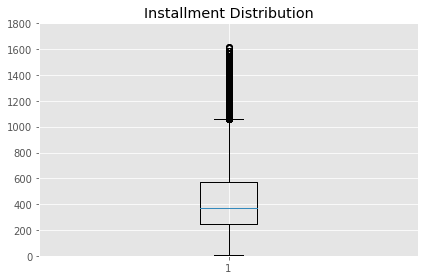

In [ ]:
#Visualization using Box & Whisker plot:

plt.boxplot(df_Accepted["installment"])
plt.title("Installment Distribution")
plt.ylim(0,1800)
plt.tight_layout()
plt.show()

In [ ]:
#Loan status vs Installment rate:

pd.pivot_table(df_Accepted, index='loan_status', values="installment", aggfunc='mean')

,installment
loan_status,
Charged Off,458.933
Fully Paid,426.928


Charged Off customers pay slightly higher installment payment than Fully paid customers. Let's see the impact of Installment Outlier's with our Target variable.

**OUTLIER DETECTION USING INTER QURTILE RANGE:**

In [ ]:
Q1 = np.quantile(df_Accepted["installment"],0.25)
Q3 = np.quantile(df_Accepted["installment"],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", round(IQR,3))
print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

Q1 : 246.91
Q3 : 573.0
IQR : 326.09
Low_outliers : -242.225
High_outliers : 1062.135


**OUTLIER DETECTION USING Z-SCORE TECHNIQUE:**

Z score = (x -mean) / std. deviation

In [ ]:
data = df_Accepted["installment"] 
mean = round(np.mean(data) , 4)
std = round(np.std(data),4)
print('mean of the dataset is', mean) 
print('std. deviation is', std)


threshold1 = -3
threshold2 =  3
outliers = [] 
for i in data: 
    z = (i-mean)/std 
    if z < threshold1 or z > threshold2: 
        outliers.append(i)

#print('outlier in the dataset:', outliers)
print('Installment threshold:', min(outliers))     
print('No.of the outliers:', len(outliers))

mean of the dataset is 433.2519
std. deviation is 257.6884
Installment threshold: 1206.41
No.of the outliers: 14084


Based on two outlier technique, **Z-score based Outlier removing technique is more suitable**

* IQR Technique gives Installment threshold of 1062.085 dollars.
* Z-Score Technique gives Installment threshold of 1206.41 Dollars.

So based on IQR, out of all the borrowers 51.56% of people who pay more than 1062.085 Dollars as monthly loan installment are not re-paying their debt.

And based on Z-Score out of all the borrowers, 58.37% of people who pay more than 1206.41 Dollars as monthly loan installment are not re-paying their debt.

**So providing loans with more than 1206.41 Dollars as monthly installment, making company to go in Loss**

In [ ]:
df_Accepted["loan_status"][df_Accepted["installment"]>=min(outliers)].value_counts()

Fully Paid     10429
Charged Off     3655
Name: loan_status, dtype: int64

In [ ]:
Outliers_Installment = df_Accepted[df_Accepted["installment"]>=min(outliers)].index
len(Outliers_Installment)

14084

In [ ]:
df_Accepted.shape

(1319955, 20)

In [ ]:
df_Accepted.drop(labels=Outliers_Installment, axis=0, inplace=True)

In [ ]:
df_Accepted.shape

(1305871, 20)

**installment rate distribution of the Customers**

Mean value of the installment : 424.21


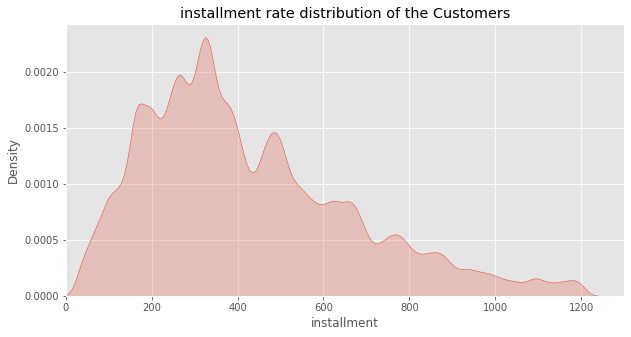

In [ ]:
#installment rate distribution of the Customers:

installment = df_Accepted["installment"]
print("Mean value of the installment :" , round(installment.mean(),2))
plt.figure(figsize=(10,5))
plt.xlim(0, 1300)
plt.title('installment rate distribution of the Customers')
sns.kdeplot(installment , shade=True)
plt.show()

#**(6).FICO SCORE(RISK SCORE):**

Based on the internet, generally Fico Scores ranging from **300 to 850** and

* Fico score 800+ is **perfect one** 
* **Good range** is from 670 to 739
* And ranging from 580 to 669 is **considered Fair**
* Less than 580 (300 to 579) is **very poor**.

However the data which we have is a historical record of 11years (from 2007 to 2018) and we only have the lowest and highest fico score with us.
So let's find the central value of that range and create a new Fico Score(Risk Score) feature out of this.because the time when we apply for a loan, we won't be having any range.


In [ ]:
df_Accepted["Risk_Score"] = (df_Accepted['fico_range_low'] + df_Accepted['fico_range_high'])/2

In [ ]:
df_Accepted.shape

(1305871, 21)

In [ ]:
df_Accepted.drop(labels=['fico_range_low', 'fico_range_high'], axis=1,inplace=True)

In [ ]:
df_Accepted.shape

(1305871, 19)

In [ ]:
df_Accepted["Risk_Score"].describe()

count   1305871.000
mean        698.190
std          31.865
min         627.000
25%         672.000
50%         692.000
75%         712.000
max         847.500
Name: Risk_Score, dtype: float64

**Risk Score, Risk factor :**

Since the adequate risk score for getting comfortable loan starts from 700, Lending club is providing from 627 itself.

* So 627 to 695(approx) is kind of a risk zone.

In [ ]:
df_Accepted["loan_status"][df_Accepted["Risk_Score"]>627][df_Accepted["Risk_Score"]<695].value_counts()

Fully Paid     549787
Charged Off    170204
Name: loan_status, dtype: int64

Looks Lending Club have approved the loan based on the Risk_score(fico_score) range from 627 to 847.5. So the customers with the risk score of below 627 is not entertained to get loan by lending club.

#**(7) public derogatory**

A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts your ability to qualify for credit or other services. Public records and collections are derogatory items because they reflect financial obligations that were not paid as agreed

In [ ]:
df_Description.loc["pub_rec"]

Description    Number of derogatory public records
Name: pub_rec, dtype: object

In [ ]:
df_Accepted["loan_status"].value_counts()

Fully Paid     1048715
Charged Off     257156
Name: loan_status, dtype: int64

In [ ]:
df_Accepted["pub_rec"].describe()

count   1305871.000
mean          0.215
std           0.600
min           0.000
25%           0.000
50%           0.000
75%           0.000
max          86.000
Name: pub_rec, dtype: float64

In [ ]:
pd.crosstab(df_Accepted["pub_rec"],df_Accepted["loan_status"], normalize="columns", margins=True) #To see in percentage

loan_status,Charged Off,Fully Paid,All
pub_rec,,,
0.000,0.807,0.836,0.830
1.000,0.161,0.138,0.142
2.000,0.021,0.017,0.018
3.000,0.006,0.005,0.005
4.000,0.002,0.002,0.002
5.000,0.001,0.001,0.001
6.000,0.001,0.000,0.000
7.000,0.000,0.000,0.000
8.000,0.000,0.000,0.000


The above details clearly shows that the borowers with more than 3 Number of derogatory public records aren't contributing much to the Lending club's Lendings comparing people who is below that threshold.

**So let's decide not to give loan to the customers who's having more than 3 No.of Derogatory public records**.

In [ ]:
df_Accepted["loan_status"][df_Accepted["pub_rec"]>3].value_counts()

Fully Paid     3844
Charged Off    1158
Name: loan_status, dtype: int64

In [ ]:
pd.crosstab(df_Accepted["loan_status"],[df_Accepted["pub_rec"]>3], normalize="index",margins=True)

pub_rec,False,True
loan_status,,
Charged Off,0.995,0.005
Fully Paid,0.996,0.004
All,0.996,0.004


In [ ]:
#Let's drop them:

Remove_Derogatory = df_Accepted[df_Accepted["pub_rec"]>=3].index

In [ ]:
df_Accepted.shape

(1305871, 19)

In [ ]:
df_Accepted.drop(labels=Remove_Derogatory, axis=0, inplace=True)

In [ ]:
df_Accepted.shape

(1293714, 19)

In [ ]:
df_Accepted.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,pub_rec,delinq_amnt,Risk_Score
count,1293714.000,1293714.000,1293714.000,1293714.000,1293714.000,1293714.000,1293714.000,1293714.000
mean,14057.364,13.075,424.420,72843.057,18.105,0.180,14.426,698.368
std,8371.568,4.552,243.813,39190.184,8.347,0.429,801.302,31.914
min,1000.000,5.310,4.930,600.000,-1.000,0.000,0.000,627.000
25%,7650.000,9.670,245.510,45000.000,11.850,0.000,0.000,672.000
50%,12000.000,12.690,369.170,65000.000,17.630,0.000,0.000,692.000
75%,20000.000,15.800,563.730,90000.000,24.000,0.000,0.000,712.000
max,40000.000,27.490,1206.290,286400.000,42.360,2.000,249925.000,847.500


#**(8) what is DELINQUENT AMOUNT?**

Delinquency means that you are behind on payments. Once you are delinquent for a certain period of time (usually nine months for federal loans), your lender will declare the loan to be in default. The entire loan balance will become due at that time.

perhaps a certain organisation having more percentage of delinquent amount that indicates that the organisation is lossing more money and going in loss.



In [ ]:
df_Description.loc["delinq_amnt"]

Description    The past-due amount owed for the accounts on which the borrower is now delinquent.
Name: delinq_amnt, dtype: object

In [ ]:
df_Accepted["delinq_amnt"].describe()

count   1293714.000
mean         14.426
std         801.302
min           0.000
25%           0.000
50%           0.000
75%           0.000
max      249925.000
Name: delinq_amnt, dtype: float64

**So let's remove the customers with higher loss risk from the dataset who's declared as a Defaulters(Charged Off) based on delinquent amount at least 5000 Dollars**

**Because these customers will do the major damage to the company**

In [ ]:
df_Accepted[df_Accepted["delinq_amnt"]>5000][df_Accepted["loan_status"]=="Charged Off"].sort_values(by="delinq_amnt", ascending=False).describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,loan_amnt,int_rate,installment,annual_inc,dti,pub_rec,delinq_amnt,Risk_Score
count,141.000,141.000,141.000,141.000,141.000,141.000,141.000,141.000
mean,15180.142,15.279,478.832,90375.730,17.846,0.340,28849.050,676.823
std,8868.381,4.004,283.294,44542.684,8.355,0.571,28737.655,16.338
min,1800.000,6.970,62.900,26000.000,1.320,0.000,5038.000,662.000
25%,8000.000,12.290,259.040,60000.000,11.890,0.000,9284.000,667.000
50%,14400.000,14.990,444.980,80000.000,16.960,0.000,18957.000,672.000
75%,21050.000,17.990,642.850,110000.000,24.000,1.000,46793.000,682.000
max,35000.000,25.990,1195.880,250000.000,35.560,2.000,249925.000,737.000


In [ ]:
#Let's Remove those customers so that we can better our accuracy a bit:

Delinquent_Remove = df_Accepted[df_Accepted["delinq_amnt"]>5000][df_Accepted["loan_status"]=="Charged Off"].sort_values(by="delinq_amnt", ascending=False).index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_Accepted.shape

(1293714, 19)

In [ ]:
df_Accepted.drop(labels=Delinquent_Remove, axis=0, inplace=True)

In [ ]:
df_Accepted.shape

(1293573, 19)

#**II. Let's Work on Categorical Variable:**



In [ ]:
df_Accepted.dtypes

loan_amnt           float64
term                 object
int_rate            float64
installment         float64
grade                object
sub_grade            object
emp_title            object
emp_length           object
home_ownership       object
annual_inc          float64
loan_status          object
purpose              object
zip_code             object
addr_state           object
dti                 float64
pub_rec             float64
application_type     object
delinq_amnt         float64
Risk_Score          float64
dtype: object

In [ ]:
df_Accepted.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title           81854
emp_length          75053
home_ownership          0
annual_inc              0
loan_status             0
purpose                 0
zip_code                1
addr_state              0
dti                     0
pub_rec                 0
application_type        0
delinq_amnt             0
Risk_Score              0
dtype: int64

# **(1) Employment Title**

* Borrowers Employee Title and Employment Length(Total Experience) are only having major Null_Values.
* Let's see how many of the loan sanctioned borrowers have re-paid their loan or Defaulted the given loan by without providing these two details.

In [ ]:
df_Accepted["emp_title"].isnull().sum()

81854

In [ ]:
print(df_Accepted["emp_title"].unique())
print(len(df_Accepted["emp_title"].unique()))

['leadman' 'Engineer' 'truck driver' ... 'personal investor'
 'Sr. Photo Producer' 'Exec Dir Internal Audit']
368707


In [ ]:
df_Accepted["emp_title"].value_counts().sort_values(ascending=False).head(10)

Teacher             20679
Manager             18678
Owner                9441
Registered Nurse     8462
RN                   8231
Supervisor           8021
Driver               7262
Sales                7089
Project Manager      6172
Office Manager       5350
Name: emp_title, dtype: int64

The Employment Title is having 368707 unique job titles and 81854 Missing Values too.

>> Let's see those 81854 Customers Loan status report:

In [ ]:
df_Accepted["loan_status"][df_Accepted["emp_title"].isnull()].value_counts()

Fully Paid     60648
Charged Off    21206
Name: loan_status, dtype: int64

Out of 81,848 profession not mentioned customers, 60,650 people have repaid their loan and 21,198 people haven't repaid their loan(Defaulters)

In [ ]:
#Let's check the Employment Experience Null values with Loan status:

df_Accepted["loan_status"][df_Accepted["emp_length"].isnull()].value_counts()

Fully Paid     55081
Charged Off    19972
Name: loan_status, dtype: int64

Out of 75,047 employment experience not mentioned borrowers, 55,081 people have repaid their loan and 19,966 people haven't repaid their loan(Defaulters)

Let's drop the defaulters who haven't provided their Employment_Designation and No.of years of experience both, because somebody is not willing to reveal these two information while taking loan maybe he's trying to manipulate something..
Let's find out..

In [ ]:
df_Accepted["loan_status"][df_Accepted["emp_title"].isnull()][df_Accepted["emp_length"].isnull()].value_counts()

Fully Paid     54656
Charged Off    19832
Name: loan_status, dtype: int64

More No.of the customers aren't repaying their loan if they have not reveal these two details: So let's remove the customers who did not repaid their loan(Charged Off).

 **Remember, data volume is Fully Paid cutomers(80%) : Charged Off customers(20%)**

In [ ]:
df_Accepted.shape

(1293573, 19)

In [ ]:
Remove_ET_EL = df_Accepted[df_Accepted["loan_status"]=="Charged Off"][df_Accepted["emp_title"].isnull()][df_Accepted["emp_length"].isnull()].index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df_Accepted.shape

(1293573, 19)

In [ ]:
df_Accepted.drop(labels=Remove_ET_EL, axis=0, inplace=True)

In [ ]:
df_Accepted.shape

(1273741, 19)

In [ ]:
df_Accepted.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title           62022
emp_length          55221
home_ownership          0
annual_inc              0
loan_status             0
purpose                 0
zip_code                1
addr_state              0
dti                     0
pub_rec                 0
application_type        0
delinq_amnt             0
Risk_Score              0
dtype: int64

Let's fill remaining employee_title null_values with "Others" category.

In [ ]:
df_Accepted["emp_title"].fillna("Others", inplace=True)

In [ ]:
df_Accepted["emp_title"].isnull().any()

False

# **(2) Employment Length:**

In [ ]:
df_Accepted['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year', nan],
      dtype=object)

In [ ]:
#Let's Replace those string into integers:

df_Accepted['emp_length'].replace(to_replace=['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years', '2 years', '5 years', '9 years', '< 1 year', '1 year'], value=[10,3,4,6,7,8,2,5,9,0,1], inplace=True)

In [ ]:
df_Accepted['emp_length'].value_counts()

10.000    424024
2.000     117511
0.000     103804
3.000     103709
1.000      85536
5.000      80910
4.000      77474
6.000      60472
8.000      58436
7.000      57554
9.000      49090
Name: emp_length, dtype: int64

In [ ]:
df_Accepted['emp_length'].isnull().sum()

55221

In [ ]:
df_Accepted["loan_status"][df_Accepted['emp_length'].isnull()].value_counts()

Fully Paid     55081
Charged Off      140
Name: loan_status, dtype: int64

**Let's do Mean Imputation for ['emp_length'] Null Values:**



In [ ]:
df_Accepted['emp_length'].mean()

5.959179168171224

**Let's do Mean Imputation for this ['emp_length'] feature (Mean value= Approx.6):**

In [ ]:
df_Accepted['emp_length'].fillna(6, inplace=True)

In [ ]:
df_Accepted['emp_length'] = df_Accepted['emp_length'].astype("int", errors="raise")

In [ ]:
df_Accepted['emp_length'].unique()  #Cool

array([10,  3,  4,  6,  7,  8,  2,  5,  9,  0,  1])

In [ ]:
pd.crosstab(df_Accepted["emp_length"],[df_Accepted["loan_status"]])

loan_status,Charged Off,Fully Paid
emp_length,,
0,20952,82852
1,17309,68227
2,22864,94647
3,20349,83360
4,15045,62429
5,15572,65338
6,11661,104032
7,11112,46442
8,11454,46982


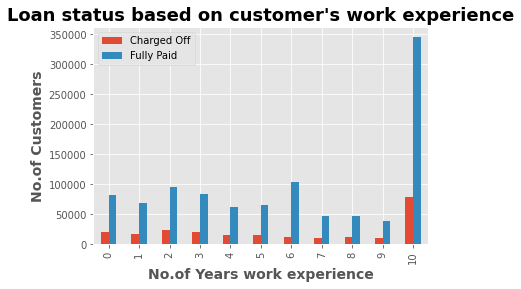

In [ ]:
pd.crosstab(df_Accepted["emp_length"],[df_Accepted["loan_status"]]).plot(kind="bar")
plt.title("Loan status based on customer's work experience", fontsize=18.0, fontweight='bold')
plt.xlabel("No.of Years work experience", fontsize=14.0, fontweight='bold')
plt.ylabel("No.of Customers", fontsize=14.0, fontweight='bold')
plt.legend(loc="best")
plt.show()

#**(3). Term >> Loan Term**

A loan term is the length of time it will take for a loan to be completely paid off when the borrower is making regular payments. The time it takes to eliminate the debt is a loan's term.

In [ ]:
df_Accepted["term"].isnull().sum()

0

In [ ]:
df_Accepted["term"].value_counts()

 36 months    967713
 60 months    306028
Name: term, dtype: int64

In [ ]:
#Let's Remove the strings in the term feature:

df_Accepted["term"] = [x.strip(" months") for x in df_Accepted["term"]]

In [ ]:
df_Accepted["term"] = df_Accepted["term"].astype("int", errors ="raise")

In [ ]:
df_Accepted["term"].dtype

dtype('int64')

In [ ]:
pd.crosstab(df_Accepted["term"], df_Accepted["loan_status"])

loan_status,Charged Off,Fully Paid
term,,
36,139672,828041
60,94752,211276


In [ ]:
#36months term customers Charged Off ratio:

X = df_Accepted['loan_status'][df_Accepted['term'] == 36].value_counts()

Term36M_Defaulters = round(X[1] / (X[0]+X[1]), 2)
Term36M_Defaulters

0.14

In [ ]:
#60months term customers Charged Off ratio:

X = df_Accepted['loan_status'][df_Accepted['term'] == 60].value_counts()

Term60M_Defaulters = round(X[1] / (X[0]+X[1]), 2)
Term60M_Defaulters

0.31

So more than 36months term, 60months term customers are defaulting more

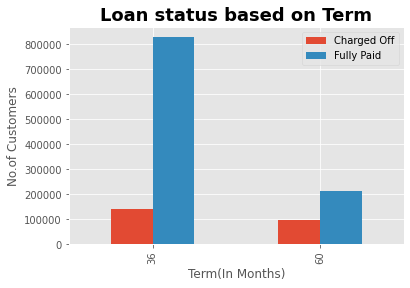

In [ ]:
pd.crosstab(df_Accepted["term"], df_Accepted["loan_status"]).plot(kind="bar")
plt.title("Loan status based on Term", fontsize=18.0, fontweight='bold')
plt.xlabel("Term(In Months)")
plt.ylabel("No.of Customers")
plt.legend(loc="best")
plt.show()

#**(4). Grade of the Customers**

Loan grading is used to assign a quality score to a loan based on the credit history of the borrower, quality of the collateral, and the likelihood of the repayment.It is the result of a formula that takes into account not only credit score, but also a combination of several indicators of credit risk from the credit report.

In [ ]:
df_Accepted.groupby(["grade"])["int_rate"].mean()

grade
A    7.113
B   10.684
C   14.012
D   17.709
E   21.100
F   23.961
G   25.664
Name: int_rate, dtype: float64

In [ ]:
X1 = df_Accepted.groupby(["grade"])["int_rate"].mean().index
Y1 = df_Accepted.groupby(["grade"])["int_rate"].mean().values

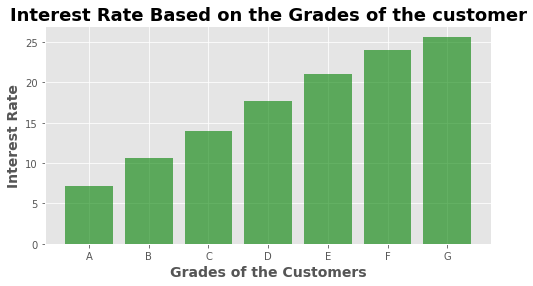

In [ ]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(8,4)) #set the size that you'd like (width, height)

plt.bar(X1, Y1, color='green', alpha=0.60)
plt.title('Interest Rate Based on the Grades of the customer',fontsize=18, fontweight='bold')
plt.xlabel("Grades of the Customers", fontsize=14.0, fontweight='bold')
plt.ylabel("Interest Rate", fontsize=14.0, fontweight='bold')
plt.show()

So we can able to see clearly as grade increases interest rate also gradually increase

#**(4). Sub Grade of the Customers**

Customers Grades are further classified into Sub_Grades in order to classify them customers in better way.

In [ ]:
df_Accepted.groupby(["sub_grade"])["int_rate"].mean()

sub_grade
A1    5.540
A2    6.521
A3    7.121
A4    7.515
A5    8.203
B1    8.909
B2    9.912
B3   10.757
B4   11.502
B5   12.016
C1   12.762
C2   13.437
C3   14.017
C4   14.707
C5   15.550
D1   16.378
D2   17.258
D3   17.943
D4   18.568
D5   19.357
E1   19.775
E2   20.433
E3   21.151
E4   22.044
E5   23.169
F1   22.981
F2   23.686
F3   24.363
F4   24.918
F5   25.316
G1   25.741
G2   25.813
G3   25.415
G4   25.311
G5   25.607
Name: int_rate, dtype: float64

In [ ]:
X2 = df_Accepted.groupby(["sub_grade"])["int_rate"].mean().index
Y2 = df_Accepted.groupby(["sub_grade"])["int_rate"].mean().values

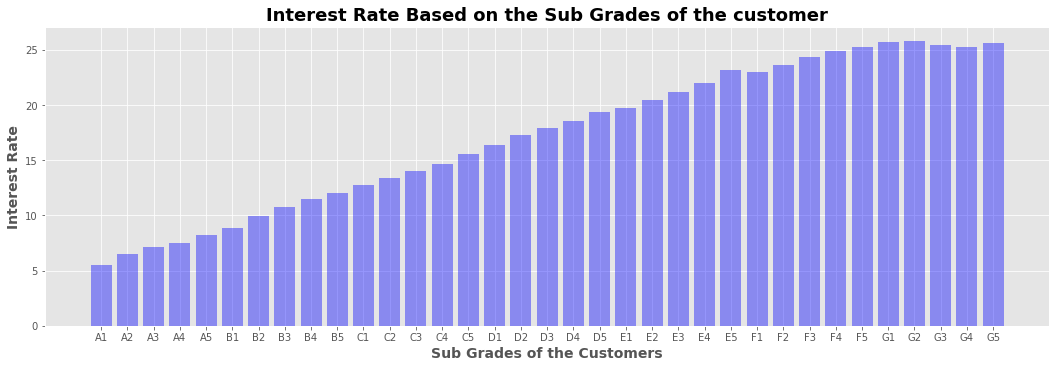

In [ ]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(18,5.5)) #set the size that you'd like (width, height)

plt.bar(X2, Y2, color='blue', alpha=0.40)
plt.title('Interest Rate Based on the Sub Grades of the customer',fontsize=18, fontweight='bold')
plt.xlabel("Sub Grades of the Customers", fontsize=14.0, fontweight='bold')
plt.ylabel("Interest Rate", fontsize=14.0, fontweight='bold')
plt.show()

In [ ]:
df_Accepted.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,zip_code,addr_state,dti,pub_rec,application_type,delinq_amnt,Risk_Score
0,3600.000,36,13.990,123.030,C,C4,leadman,10,MORTGAGE,55000.000,Fully Paid,debt_consolidation,190xx,PA,5.910,0.000,Individual,0.000,677.000
1,24700.000,36,11.990,820.280,C,C1,Engineer,10,MORTGAGE,65000.000,Fully Paid,small_business,577xx,SD,16.060,0.000,Individual,0.000,717.000
2,20000.000,60,10.780,432.660,B,B4,truck driver,10,MORTGAGE,63000.000,Fully Paid,home_improvement,605xx,IL,10.780,0.000,Joint App,0.000,697.000
4,10400.000,60,22.450,289.910,F,F1,Contract Specialist,3,MORTGAGE,104433.000,Fully Paid,major_purchase,174xx,PA,25.370,0.000,Individual,0.000,697.000
5,11950.000,36,13.440,405.180,C,C3,Veterinary Tecnician,4,RENT,34000.000,Fully Paid,debt_consolidation,300xx,GA,10.200,0.000,Individual,0.000,692.000


# **(5) HOME OWNERSHIP**

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

In [ ]:
df_Accepted["home_ownership"].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [ ]:
df_Accepted["home_ownership"].value_counts()

MORTGAGE    628867
RENT        509373
OWN         135048
ANY            265
OTHER          142
NONE            46
Name: home_ownership, dtype: int64

Since 'ANY', 'NONE', 'OTHER' categories are containing very few customers, Let's replace all into one category and drop it from the analysis.

In [ ]:
df_Accepted["home_ownership"].replace(['ANY', 'NONE', 'OTHER'], "OTHERS", inplace=True)

In [ ]:
df_Accepted["home_ownership"].value_counts()

MORTGAGE    628867
RENT        509373
OWN         135048
OTHERS         453
Name: home_ownership, dtype: int64

In [ ]:
df_Accepted[df_Accepted["home_ownership"] == "OTHERS"].index

Int64Index([  26480,  203353,  492111,  553622,  574868,  591301,  607073,
             619848,  773138,  784334,
            ...
            2179759, 2179770, 2180228, 2180776, 2181225, 2206113, 2209498,
            2237261, 2237397, 2258360],
           dtype='int64', length=453)

In [ ]:
df_Accepted["loan_status"][df_Accepted["home_ownership"]=="OTHERS"].value_counts()

Fully Paid     375
Charged Off     78
Name: loan_status, dtype: int64

In [ ]:
df_Accepted["home_ownership"].value_counts()

MORTGAGE    628867
RENT        509373
OWN         135048
OTHERS         453
Name: home_ownership, dtype: int64

In [ ]:
X1 = df_Accepted["home_ownership"].value_counts().index
Y1 = df_Accepted["home_ownership"].value_counts().values
print(X1)
print(Y1)

Index(['MORTGAGE', 'RENT', 'OWN', 'OTHERS'], dtype='object')
[628867 509373 135048    453]


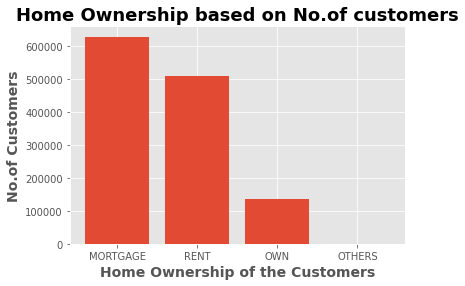

In [ ]:
plt.bar(X1, Y1)
plt.title('Home Ownership based on No.of customers',fontsize=18, fontweight='bold')
plt.xlabel("Home Ownership of the Customers", fontsize=14.0, fontweight='bold')
plt.ylabel("No.of Customers", fontsize=14.0, fontweight='bold')
plt.show()

**> Home Ownership of the Customers based on loan status**

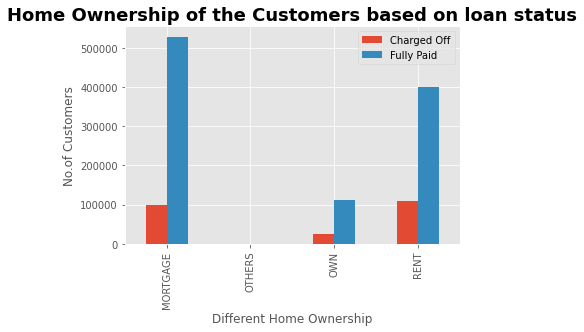

In [ ]:
pd.crosstab(df_Accepted["home_ownership"], df_Accepted["loan_status"]).plot(kind="bar")
plt.title("Home Ownership of the Customers based on loan status", fontsize=18.0, fontweight='bold')
plt.xlabel("Different Home Ownership")
plt.ylabel("No.of Customers")
plt.legend(loc="best")
plt.show()

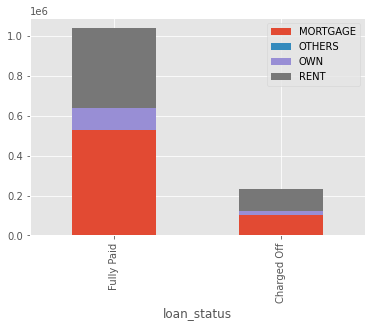

In [ ]:
SS = pd.crosstab(df_Accepted["loan_status"], df_Accepted["home_ownership"]).sort_values(by="loan_status", ascending=False)

SS.plot(kind='bar', stacked=True)
plt.legend(loc="best")
plt.show()

In [ ]:
pd.crosstab(df_Accepted["home_ownership"], df_Accepted["loan_status"])

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,100112,528755
OTHERS,78,375
OWN,24250,110798
RENT,109984,399389


**Loan_status and interest rate mean based on different different Home_ownership customers:**

In [ ]:
pd.crosstab(df_Accepted["home_ownership"], df_Accepted["loan_status"], values=df_Accepted["int_rate"], aggfunc='mean')

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,15.314,12.235
OTHERS,15.274,12.903
OWN,15.403,12.540
RENT,15.576,12.851


**Grade, Loan_status and interest rate mean based on different different Home_ownership customers:**

In [ ]:
A = pd.crosstab(df_Accepted["grade"],[df_Accepted["home_ownership"], df_Accepted["loan_status"]], values=df_Accepted["int_rate"], aggfunc='mean')
A

home_ownership    MORTGAGE                 OTHERS                    OWN  \
loan_status    Charged Off Fully Paid Charged Off Fully Paid Charged Off   
grade                                                                      
A                    7.382      7.047       8.333      7.633       7.358   
B                   10.777     10.628      11.645     11.007      10.745   
C                   14.114     14.022      14.127     14.270      14.040   
D                   17.758     17.693      17.534     17.846      17.852   
E                   21.063     21.097      22.465     21.381      21.285   
F                   24.053     23.824      19.590     22.249      24.176   
G                   25.764     25.468         nan     24.890      25.932   

home_ownership                   RENT             
loan_status    Fully Paid Charged Off Fully Paid  
grade                                             
A                   7.054       7.449      7.202  
B                  10.617      10.848     10.731  
C                  13.952      14.048     13.976  
D                  17.734      17.765     17.660  
E                  21.250      21.178     21.004  
F                  24.019      24.147     23.829  
G                  25.833      25.874     25.518

Looks there is no much difference between Fully Paid and Charged Off customers Interest rate, but based on the grade the interest rate is clearly raising up.

**Home Ownership vs Loan_Status vs Term vs Interest_Rate:**

In [ ]:
pd.crosstab(df_Accepted["home_ownership"], [df_Accepted["loan_status"],df_Accepted["term"]],values=df_Accepted["int_rate"], aggfunc=np.mean,  margins=True)

loan_status    Charged Off        Fully Paid           All
term                    36     60         36     60       
home_ownership                                            
MORTGAGE            13.457 17.346     11.130 15.559 12.725
OTHERS              14.831 17.709     12.358 16.447 13.311
OWN                 14.059 17.704     11.793 15.933 13.054
RENT                14.261 18.068     12.198 16.592 13.440
All                 13.938 17.670     11.642 15.885 13.046

In [ ]:
df_Accepted.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,zip_code,addr_state,dti,pub_rec,application_type,delinq_amnt,Risk_Score
0,3600.000,36,13.990,123.030,C,C4,leadman,10,MORTGAGE,55000.000,Fully Paid,debt_consolidation,190xx,PA,5.910,0.000,Individual,0.000,677.000
1,24700.000,36,11.990,820.280,C,C1,Engineer,10,MORTGAGE,65000.000,Fully Paid,small_business,577xx,SD,16.060,0.000,Individual,0.000,717.000
2,20000.000,60,10.780,432.660,B,B4,truck driver,10,MORTGAGE,63000.000,Fully Paid,home_improvement,605xx,IL,10.780,0.000,Joint App,0.000,697.000
4,10400.000,60,22.450,289.910,F,F1,Contract Specialist,3,MORTGAGE,104433.000,Fully Paid,major_purchase,174xx,PA,25.370,0.000,Individual,0.000,697.000
5,11950.000,36,13.440,405.180,C,C3,Veterinary Tecnician,4,RENT,34000.000,Fully Paid,debt_consolidation,300xx,GA,10.200,0.000,Individual,0.000,692.000


#**6) OTHER CATEGORICAL VARIABLES**

In [ ]:
df_Accepted[["purpose","zip_code","addr_state", "application_type"]]

,purpose,zip_code,addr_state,application_type
0,debt_consolidation,190xx,PA,Individual
1,small_business,577xx,SD,Individual
2,home_improvement,605xx,IL,Joint App
4,major_purchase,174xx,PA,Individual
5,debt_consolidation,300xx,GA,Individual
...,...,...,...,...
2260686,debt_consolidation,441xx,OH,Individual
2260688,home_improvement,775xx,TX,Individual
2260690,debt_consolidation,900xx,CA,Individual
2260691,home_improvement,863xx,AZ,Individual


In [ ]:
df_Accepted["purpose"].unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [ ]:
df_Accepted["purpose"].value_counts().sort_values(ascending=False)

debt_consolidation    738411
credit_card           282757
home_improvement       81148
other                  73195
major_purchase         27785
medical                14634
car                    14038
small_business         13991
moving                  8980
vacation                8734
house                   6605
wedding                 2260
renewable_energy         883
educational              320
Name: purpose, dtype: int64

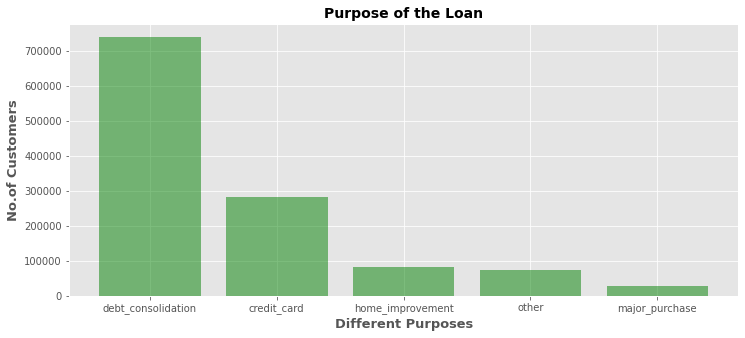

In [ ]:
A = df_Accepted["purpose"].value_counts().sort_values(ascending=False)[:5]
f, ax = plt.subplots(figsize=(12,5))
plt.bar(A.index, A.values, color="green", alpha=0.5)
plt.title("Purpose of the Loan", fontsize=14.0, fontweight='bold')
plt.xlabel("Different Purposes", fontsize=13.0, fontweight='bold')
plt.ylabel("No.of Customers", fontsize=13.0, fontweight='bold')
plt.show()

In [ ]:
pd.crosstab(df_Accepted["purpose"], df_Accepted["loan_status"].sort_values(ascending=False))

loan_status,Charged Off,Fully Paid
purpose,,
car,1868,12170
credit_card,43988,238769
debt_consolidation,144689,593722
educational,51,269
home_improvement,13025,68123
house,1324,5281
major_purchase,4734,23051
medical,2818,11816
moving,1940,7040


In [ ]:
pd.crosstab(df_Accepted["application_type"],df_Accepted["loan_status"])

loan_status,Charged Off,Fully Paid
application_type,,
Individual,230664,1024361
Joint App,3760,14956


In [ ]:
df_Accepted["zip_code"].describe()

count     1273740
unique        941
top         945xx
freq        14143
Name: zip_code, dtype: object

In [ ]:
df_Accepted["addr_state"].describe()

count     1273741
unique         51
top            CA
freq       186249
Name: addr_state, dtype: object

["purpose","zip_code","addr_state", "application_type"]

So these 4 categorical variables are not providing any using lead towards our analysis. So let's drop them all.

In [ ]:
df_Accepted.drop(labels=["purpose","zip_code","addr_state", "application_type"], axis=1, inplace=True)

#**Summary of Risk Factors:**

So based on our analysis Risk factors of,

* Interest Rate more than 18%,
* Debt-to-income-ratio more than 35,
* Risk Scores from 627 to 695

Let's make sure that all the risk factors not getting combining and affecting our model.

In [ ]:
df_Accepted["loan_status"][df_Accepted["int_rate"]>18][df_Accepted["dti"]>35][df_Accepted["Risk_Score"]>=627][df_Accepted["Risk_Score"]<695].value_counts()

Fully Paid     2914
Charged Off    2328
Name: loan_status, dtype: int64

In [ ]:
Remove_Risk = list(df_Accepted[df_Accepted["int_rate"]>18][df_Accepted["dti"]>35][df_Accepted["Risk_Score"]>=627][df_Accepted["Risk_Score"]<695].index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df_Accepted.drop(labels=Remove_Risk, axis=0, inplace=True)

In [ ]:
df_Accepted.shape

(1268499, 15)

In [ ]:
df_Accepted.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,dti,pub_rec,delinq_amnt,Risk_Score
0,3600.000,36,13.990,123.030,C,C4,leadman,10,MORTGAGE,55000.000,Fully Paid,5.910,0.000,0.000,677.000
1,24700.000,36,11.990,820.280,C,C1,Engineer,10,MORTGAGE,65000.000,Fully Paid,16.060,0.000,0.000,717.000
2,20000.000,60,10.780,432.660,B,B4,truck driver,10,MORTGAGE,63000.000,Fully Paid,10.780,0.000,0.000,697.000
4,10400.000,60,22.450,289.910,F,F1,Contract Specialist,3,MORTGAGE,104433.000,Fully Paid,25.370,0.000,0.000,697.000
5,11950.000,36,13.440,405.180,C,C3,Veterinary Tecnician,4,RENT,34000.000,Fully Paid,10.200,0.000,0.000,692.000


#**LENDING CLUB'S REJECTED APPLICANT'S DATASET:**

**OBJECTIVE OF THE ANALYSIS:**

Based on the Accepted dataset feature's threshold values, we gonna extract the records which is going to strongly support for not to approve loan.

In [ ]:
df_Rejected = pd.read_csv("/content/drive/MyDrive/Kaggle/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv")
df_Rejected.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.000,2007-05-26,Wedding Covered but No Honeymoon,693.000,10%,481xx,NM,4 years,0.000
1,1000.000,2007-05-26,Consolidating Debt,703.000,10%,010xx,MA,< 1 year,0.000
2,11000.000,2007-05-27,Want to consolidate my debt,715.000,10%,212xx,MD,1 year,0.000
3,6000.000,2007-05-27,waksman,698.000,38.64%,017xx,MA,< 1 year,0.000
4,1500.000,2007-05-27,mdrigo,509.000,9.43%,209xx,MD,< 1 year,0.000


In [ ]:
df_Rejected.shape

(27648741, 9)

In [ ]:
df_Description = pd.read_excel("/content/drive/MyDrive/Kaggle/LCDataDictionary.xlsx", sheet_name = 2, index_col = 0) #Path of my Google drive source
df_Description

,Description
RejectStats File,
Amount Requested,The total amount requested by the borrower
Application Date,The date which the borrower applied
Loan Title,The loan title provided by the borrower
Risk_Score,"For applications prior to November 5, 2013 the risk score is the borrower's FICO score. For applications after November 5, 2013 the risk score is the borrower's Vantage score."
Debt-To-Income Ratio,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
Zip Code,The first 3 numbers of the zip code provided by the borrower in the loan application.
State,The state provided by the borrower in the loan application
Employment Length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
Policy Code,publicly available policy_code=1\nnew products not publicly available policy_code=2


From Rejected dataset,the valuable features which helps our analysis is Amount Requested, Risk_Score, Debt-To-Income Ratio, Employment Length. So let's drop the other features.

In [ ]:
df_Rejected.drop(labels=['Application Date', 'Loan Title', 'Zip Code', 'State', 'Policy Code'], axis=1, inplace=True)

In [ ]:
df_Rejected.head()

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length
0,1000.000,693.000,10%,4 years
1,1000.000,703.000,10%,< 1 year
2,11000.000,715.000,10%,1 year
3,6000.000,698.000,38.64%,< 1 year
4,1500.000,509.000,9.43%,< 1 year


In [ ]:
df_Rejected.isnull().sum()

Amount Requested               0
Risk_Score              18497630
Debt-To-Income Ratio           0
Employment Length         951355
dtype: int64

**Let's drop all the Missing Values**

In [ ]:
df_Rejected.dropna(axis=0, how="any", inplace=True)

In [ ]:
df_Rejected.isnull().any()

Amount Requested        False
Risk_Score              False
Debt-To-Income Ratio    False
Employment Length       False
dtype: bool

In [ ]:
df_Rejected.shape  #Our base data for rejecting applicants

(8992595, 4)

We need to transform Debt-To-Income Ratio and Employment Length into a numerical form for better analysis:

**(I) Debt-To-Income Ratio:**


In [ ]:
#Let's remove "%" from 'Debt-To-Income Ratio' and change the dtype as float, so that we can able to perform numerical operations:

df_Rejected['Debt-To-Income Ratio'] = [x.strip('%') for x in df_Rejected['Debt-To-Income Ratio']]

In [ ]:
#Let's convert that into float

df_Rejected['Debt-To-Income Ratio']=df_Rejected['Debt-To-Income Ratio'].astype(float, errors = 'raise')

In [ ]:
df_Rejected['Debt-To-Income Ratio'].dtype

dtype('float64')

In [ ]:
df_Rejected['Debt-To-Income Ratio'].describe()

count    8992595.000
mean         169.568
std        17767.843
min           -1.000
25%            9.060
50%           20.550
75%           36.260
max     50000031.490
Name: Debt-To-Income Ratio, dtype: float64

**(II) Employment Length :**

In [ ]:
df_Rejected["Employment Length"].unique()

array(['4 years', '< 1 year', '1 year', '3 years', '2 years', '10+ years',
       '9 years', '5 years', '7 years', '6 years', '8 years'],
      dtype=object)

In [ ]:
#Let's Replace the strings into integers:

df_Rejected['Employment Length'].replace(to_replace=['4 years', '< 1 year', '1 year', '3 years', '2 years', '10+ years',
       '7 years', '8 years', '5 years', '6 years', '9 years'], value=[4,0,1,3,2,10,7,8,5,6,9], inplace=True)

In [ ]:
df_Rejected['Employment Length'].unique()

array([ 4,  0,  1,  3,  2, 10,  9,  5,  7,  6,  8])

In [ ]:
df_Rejected['Employment Length'].dtype

dtype('int64')

In [ ]:
df_Rejected["Employment Length"].unique()

array([ 4,  0,  1,  3,  2, 10,  9,  5,  7,  6,  8])

In [ ]:
df_Rejected['Employment Length'].dtype

dtype('int64')

In [ ]:
df_Rejected.shape

(8992595, 4)

In [ ]:
df_Rejected_Modify = df_Rejected.copy(deep=True)

**(1) Lending Club Loan amount range is from 1000 to 40000 Dollars**

Let's find out how many customers that have applied loan with less than 1000 dollar and more than 40000 dollar, those customers will not get loan approval.

In [ ]:
print(len(df_Rejected_Modify["Amount Requested"][df_Rejected_Modify["Amount Requested"]<1000]))
print(len(df_Rejected_Modify["Amount Requested"][df_Rejected_Modify["Amount Requested"]>40000]))

448
3609


In [ ]:
#Let's find them and remove from the dataset:

Remove_Amt_R = df_Rejected_Modify["Amount Requested"][df_Rejected_Modify["Amount Requested"]<1000].index.append(df_Rejected_Modify["Amount Requested"][df_Rejected_Modify["Amount Requested"]>40000].index)

In [ ]:
df_Rejected_Modify.drop(labels =Remove_Amt_R, axis=0, inplace=True)

In [ ]:
df_Rejected_Modify.shape

(8988538, 4)

**(2) RISK SCORE(FICO Score) of the customers, ranging from 300 to 850**

Accepted applicants risk score range = 627-850.

But based on the Accepted loan applicants data, we have seen less than 627 Fico Score(Risk score) won't get loan..

In [ ]:
#Definitely somebody is not willing to provide their Risk Score, those applications will not be eligible for loan approval..

df_Rejected_Modify = df_Rejected_Modify.dropna(axis=0, subset=['Risk_Score'])

In [ ]:
print("No.of Applications with Risk score less than 627 :" ,len(df_Rejected_Modify["Risk_Score"][df_Rejected_Modify["Risk_Score"]<627].index))
print("No.of Applications with Risk score more than 900 :" ,len(df_Rejected_Modify["Risk_Score"][df_Rejected_Modify["Risk_Score"]>850].index))

No.of Applications with Risk score less than 627 : 3951625
No.of Applications with Risk score more than 900 : 25905


In [ ]:
#Let's Remove:

Remove_Risk_Score = (df_Rejected_Modify["Risk_Score"][df_Rejected_Modify["Risk_Score"]<627].index).append(df_Rejected_Modify["Risk_Score"][df_Rejected_Modify["Risk_Score"]>850].index)
print(len(Remove_Risk_Score))

3977530


In [ ]:
df_Rejected_Modify.drop(Remove_Risk_Score, axis=0, inplace=True)

In [ ]:
df_Rejected_Modify.shape

(5011008, 4)

In [ ]:
df_Rejected_Modify.isnull().sum()

Amount Requested        0
Risk_Score              0
Debt-To-Income Ratio    0
Employment Length       0
dtype: int64

** (3) Debt to income ratio must be below 42.36%(Based on accepted dataset outlier threshold, at minimum level to be Eligible for loan)**:

If its more than 43% generally the person finds difficulty in paying his bills(Kind of a financial stress).
Though providing loan with the DTI ratio percentage of 40% as a threshold limit is a common practice which followed by many banks and lending forums.

In [ ]:
df_Rejected_Modify['Debt-To-Income Ratio'].sample(5)

509547     32.170
20660231    3.320
9699204    23.300
20462294   34.280
20526983   19.480
Name: Debt-To-Income Ratio, dtype: float64

In [ ]:
Reject_DTI = df_Rejected_Modify[df_Rejected_Modify['Debt-To-Income Ratio']>=42.36].index

In [ ]:
df_Rejected_Modify.drop(labels=Reject_DTI, axis=0, inplace=True)

In [ ]:
df_Rejected_Modify.shape

(3971581, 4)

In [ ]:
df_Rejected_Modify.head()

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length
0,1000.000,693.000,10.000,4
1,1000.000,703.000,10.000,0
2,11000.000,715.000,10.000,1
3,6000.000,698.000,38.640,0
5,15000.000,645.000,0.000,3


In [ ]:
df_Rejected_Modify.sample(5)

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length
26404636,10000.000,664.000,29.540,0
493096,4000.000,666.000,4.650,0
7387955,30000.000,630.000,20.300,0
12979501,6000.000,640.000,14.870,0
12447579,15000.000,728.000,41.810,0


So from rejected dataset we need some conclusive evidence of records which is beyond the appropriate limit threshold.
So we need to get the records from the base rejected dataset which is not present in the df_Rejected_Modify.

In [ ]:
df_Rejected.index

Int64Index([       0,        1,        2,        3,        4,        5,
                   6,        7,        8,        9,
            ...
            27648725, 27648726, 27648727, 27648729, 27648732, 27648733,
            27648734, 27648736, 27648738, 27648740],
           dtype='int64', length=8992595)

In [ ]:
df_Rejected_Modify.index

Int64Index([       0,        1,        2,        3,        5,        6,
                   7,        8,       10,       11,
            ...
            27648674, 27648675, 27648692, 27648696, 27648698, 27648725,
            27648729, 27648732, 27648738, 27648740],
           dtype='int64', length=3971581)

In [ ]:
df_Rejected.shape

(8992595, 4)

In [ ]:
df_Rejected_Modify.shape

(3971581, 4)

In [ ]:
X = []
for index in df_Rejected.index:
  if index in df_Rejected_Modify.index:
    pass
  else:
    X.append(index)

print(len(X))

5021014


In [ ]:
df_Rejected_final = df_Rejected.loc[X]

In [ ]:
df_Rejected_final.shape

(5021014, 4)

In [ ]:
df_Rejected_final.sample(5)

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length
19809089,40000.000,607.000,22.340,0
3413437,15000.000,662.000,100.000,0
12508224,2500.000,591.000,21.080,0
13147200,10000.000,608.000,8.790,0
9123170,3500.000,512.000,3.390,0


In [ ]:
df_Rejected_final["Target"] = 0

In [ ]:
df_Rejected_final.sample(5)

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length,Target
21765826,24000.000,622.000,22.590,0,0
26820465,4000.000,517.000,0.000,0,0
9486199,1000.000,572.000,14.400,0,0
11826407,1400.000,501.000,13.050,0,0
12073883,2000.000,501.000,18.660,0,0


These five features we are going to consider for our analysis. So let's modify the accepted dataset features, so that we can able to merge both and proceed our modelling part.

We need only these 5 features from Accepted dataset ["Amount Requested", "Risk_Score","Debt-To-Income Ratio","Employment Length","Target"]. Then we are going to combine both accepted and rejected dataset.

In [ ]:
df_Accepted.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'loan_status', 'dti', 'pub_rec', 'delinq_amnt', 'Risk_Score'],
      dtype='object')

In [ ]:
Drop_Features = ['term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'home_ownership', 'annual_inc','pub_rec', 'delinq_amnt']

df_Accepted.drop(labels=Drop_Features, axis=1, inplace=True)

**Let's rename all the accepted dataset features in order to make common to rejected:**

In [ ]:
df_Accepted.rename(columns={"loan_status": "Target", "loan_amnt" : "Amount Requested", "emp_length":"Employment Length",
                            "dti":"Debt-To-Income Ratio"},inplace=True )

In [ ]:
#Re-order:

df_Accepted = df_Accepted[["Amount Requested", "Risk_Score", "Debt-To-Income Ratio", "Employment Length", "Target"]]

In [ ]:
df_Accepted.head()

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length,Target
0,3600.000,677.000,5.910,10,Fully Paid
1,24700.000,717.000,16.060,10,Fully Paid
2,20000.000,697.000,10.780,10,Fully Paid
4,10400.000,697.000,25.370,3,Fully Paid
5,11950.000,692.000,10.200,4,Fully Paid


In [ ]:
df_Accepted.shape

(1268499, 5)

In [ ]:
df_Accepted["Target"].replace(to_replace=["Fully Paid","Charged Off"], value=[1,0], inplace=True)

In [ ]:
df_Accepted["Target"].value_counts()

1    1036403
0     232096
Name: Target, dtype: int64

In [ ]:
sample = (df_Accepted["Target"].value_counts()[1] - df_Accepted["Target"].value_counts()[0])
sample

804307

**So we need to take sample from df_Rejected_final dataframe and merge with df_Accepted dataset:**

In [ ]:
df_Rejected_sample = df_Rejected_final.sample(sample, random_state=42)
df_Rejected_sample

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length,Target
28488,10000.000,501.000,25.550,0,0
26849277,12000.000,624.000,30.110,0,0
16945492,1000.000,566.000,0.000,0,0
27450117,5000.000,616.000,8.140,0,0
3462904,20000.000,608.000,2.220,0,0
...,...,...,...,...,...
21730803,20000.000,680.000,45.150,0,0
2964192,20000.000,602.000,15.870,0,0
21959404,6000.000,667.000,63.740,5,0
9628088,3000.000,602.000,14.820,0,0


In [ ]:
df_Lending_Club = pd.concat([df_Accepted, df_Rejected_sample], axis=0, ignore_index=True)

In [ ]:
df_Lending_Club.shape

(2072806, 5)

In [ ]:
df_Lending_Club.tail(10)  #Reset index is required

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length,Target
2072796,5000.000,508.000,3.170,0,0
2072797,5000.000,547.000,23.750,0,0
2072798,2000.000,501.000,24.960,0,0
2072799,10000.000,711.000,42.810,6,0
2072800,1000.000,545.000,0.000,0,0
2072801,20000.000,680.000,45.150,0,0
2072802,20000.000,602.000,15.870,0,0
2072803,6000.000,667.000,63.740,5,0
2072804,3000.000,602.000,14.820,0,0
2072805,15000.000,621.000,35.880,0,0


In [ ]:
df_Lending_Club.reset_index(drop=True, inplace=True)

**Feature Scaling techniques : Normalization Vs Standadization:**

**When to use Feature Scaling?**

  We need to perform Feature Scaling when we are dealing with Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM) as these are very sensitive to the range of the data points

  **(i) Normalization :**

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as **Min-Max scaling**.

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution.

    x_scaled = (x – x_min)/(x_max – x_min) ; data ranging from 0 to 1.

  **(ii) Standadization :**

Data standardization is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1. Standardization assumes that your data has a Gaussian (bell curve) distribution.it's also known as **standardscalar**

    x_scaled = x – mean/std_dev   ;  data ranging from -3 to 3.

  > Since all the features in our dataset have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature.So let's perform Normalization(Min-Max Scalar) and Standardisation(Standardscalar) and compare the performance.



In [ ]:
df_Lending_Club.head()

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length,Target
0,3600.000,677.000,5.910,10,1
1,24700.000,717.000,16.060,10,1
2,20000.000,697.000,10.780,10,1
3,10400.000,697.000,25.370,3,1
4,11950.000,692.000,10.200,4,1


In [ ]:
df_Lending_Club["Target"].value_counts()

1    1036403
0    1036403
Name: Target, dtype: int64

In [ ]:
df_Lending_Club.head()

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length,Target
0,3600.000,677.000,5.910,10,1
1,24700.000,717.000,16.060,10,1
2,20000.000,697.000,10.780,10,1
3,10400.000,697.000,25.370,3,1
4,11950.000,692.000,10.200,4,1


In [ ]:
''' 
#Saving file from colab to local machine:

from google.colab import files
df_Lending_Club.to_csv("Lending_Club's_loan_approval_optimization.csv")
files.download("Lending_Club's_loan_approval_optimization.csv")
'''

' \n#Saving file from colab to local machine:\n\nfrom google.colab import files\ndf_Lending_Club.to_csv("Lending_Club\'s_loan_approval_optimization.csv")\nfiles.download("Lending_Club\'s_loan_approval_optimization.csv")\n'

#**Let's split the data for training and testing:**



In [ ]:
# spliting training and testing data
from sklearn.model_selection import train_test_split

X = df_Lending_Club.drop("Target", axis=1)
y = df_Lending_Club["Target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_test.shape)
print(y_test.shape)

(414562, 4)
(414562,)


**Apply Normalization Feature Scaling Technique on independent variables :**

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [ ]:
X_train_norm

array([[1.41448778e-02, 6.98989899e-01, 5.21092830e-06, 1.00000000e+00],
       [1.05729390e-02, 6.29292929e-01, 1.70926761e-05, 0.00000000e+00],
       [1.76810973e-03, 7.34343434e-01, 6.84226577e-06, 2.00000000e-01],
       ...,
       [7.00100014e-03, 7.04040404e-01, 1.25675330e-05, 2.00000000e-01],
       [1.77168167e-02, 6.93939394e-01, 6.20843401e-06, 1.00000000e-01],
       [1.77168167e-02, 6.78787879e-01, 5.02909132e-06, 1.00000000e+00]])

In [ ]:
print(X_train_norm.shape)
print(X_test_norm.shape)

(1658244, 4)
(414562, 4)


In [ ]:
# Normalisation Generally transform the data from 0 to 1.

print(X_train_norm.min())
print(X_train_norm.max())

0.0
1.0


**Apply Standardisation Feature Scaling Technique on independent variables :**

In [ ]:
#Data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

#Copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

In [ ]:
#Numerical features
num_cols = ['Amount Requested','Risk_Score','Debt-To-Income Ratio','Employment Length']

#Apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [ ]:
X_train_stand.head(5)

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length
331309,0.743,0.419,-0.024,1.548
1705188,0.217,-0.386,-0.018,-0.924
870807,-1.080,0.827,-0.023,-0.429
31021,-0.625,0.069,-0.024,-0.182
1535739,1.795,-0.480,-0.020,-0.924


In [ ]:
X_test_stand.head(5)

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length
1386677,-0.835,0.395,-0.012,0.312
35953,-0.941,0.768,-0.023,-0.924
407930,0.953,0.185,-0.023,0.559
544379,1.795,0.768,-0.022,-0.429
1038299,-0.309,0.827,-0.024,1.548


In [ ]:
print(X_train_stand.shape)
print(X_test_stand.shape)

(1658244, 4)
(414562, 4)


In [ ]:
#Standardisation Generally transform the data from -3 to 3. (mean=0 and std or varience=1)

print(X_train_stand.min())
print(X_train_stand.max())

Amount Requested       -1.340
Risk_Score             -7.652
Debt-To-Income Ratio   -0.026
Employment Length      -0.924
dtype: float64
Amount Requested       145.951
Risk_Score               3.894
Debt-To-Income Ratio   423.591
Employment Length        1.548
dtype: float64


* standardisation feature scaling technique won't handle outliers, but robust scaling can handle outliers.

* Standardization can become skewed or biased if the input variable contains outlier values.To overcome this, the median and interquartile range can be used when standardizing numerical input variables, generally referred to as robust scaling(robust scaler transform)

**(iii) Robust Scaling Technique :**

In [ ]:
#import Robust_scaler method:
from sklearn.preprocessing import RobustScaler

#Copy of datasets
X_train_Rs = X_train.copy()
X_test_Rs = X_test.copy()

#Fit scaler on training data:
Robust_scale = RobustScaler().fit(X_train_Rs)

#Transform training data:
X_train_Robust = Robust_scale.transform(X_train_Rs)

#Transform testing data:
X_test_Robust = Robust_scale.transform(X_test_Rs)

In [ ]:
X_train_Robust

array([[ 0.70422535,  0.2247191 , -0.56327251,  1.        ],
       [ 0.35211268, -0.5505618 ,  0.78281342, -0.25      ],
       [-0.51584507,  0.61797753, -0.37845792,  0.        ],
       ...,
       [ 0.        ,  0.28089888,  0.27015892,  0.        ],
       [ 1.05633803,  0.16853933, -0.45026486, -0.125     ],
       [ 1.05633803,  0.        , -0.58387287,  1.        ]])

In [ ]:
X_test_Robust

array([[-0.35211268,  0.20224719,  2.57563273,  0.375     ],
       [-0.42253521,  0.56179775, -0.2931136 , -0.25      ],
       [ 0.84507042,  0.        , -0.40553267,  0.5       ],
       ...,
       [ 0.07042254,  0.28089888, -0.42436727,  1.        ],
       [-0.33802817,  1.34831461, -0.60211889,  0.5       ],
       [-0.56338028, -1.92134831, -0.65979988, -0.25      ]])

In [ ]:
print(X_train_Robust.min())
print(X_test_Robust.max())

-7.550561797752809
139845.874043555
